# **Part 1: Multindex Objects**

# **Pivot Table**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
df.shape

(244, 7)

In [4]:
# with groupby
df.groupby('sex')['total_bill'].mean()

<ipython-input-4-c0a54f6bb221>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('sex')['total_bill'].mean()


,total_bill
sex,
Male,20.744076
Female,18.056897


In [7]:
df.groupby(['sex', 'smoker'])['total_bill'].mean().unstack()

<ipython-input-7-b2337901a436>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['sex', 'smoker'])['total_bill'].mean().unstack()


smoker,Yes,No
sex,,
Male,22.284500,19.791237
Female,17.977879,18.105185


In [ ]:
# with pivot table
df.pivot_table(index='sex', columns='smoker', values='total_bill')

<ipython-input-18-937192477d33>:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(index='sex', columns='smoker', values='total_bill')


smoker,Yes,No
sex,,
Male,22.284500,19.791237
Female,17.977879,18.105185


In [10]:
# aggfunc --> mean, count, sum, std
df.pivot_table(index='sex', columns='smoker', aggfunc={'total_bill': 'count', 'tip': 'mean'})

<ipython-input-10-10a63de50db9>:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(index='sex', columns='smoker', aggfunc={'total_bill': 'count', 'tip': 'mean'})


tip           total_bill    
smoker       Yes        No        Yes  No
sex                                      
Male    3.051167  3.113402         60  97
Female  2.931515  2.773519         33  54

In [8]:
# all cols together
df.pivot_table(index='sex', columns='smoker', numerical_only=True)
# this don't work now
# instead

TypeError: DataFrame.pivot_table() got an unexpected keyword argument 'numerical_only'

In [9]:
# instead
num_cols = df.select_dtypes(include=np.number).columns
df.pivot_table(index='sex', columns='smoker', values=num_cols)

<ipython-input-9-4e7cfef6ea42>:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(index='sex', columns='smoker', values=num_cols)


size                 tip           total_bill           
smoker       Yes        No       Yes        No        Yes         No
sex                                                                 
Male    2.500000  2.711340  3.051167  3.113402  22.284500  19.791237
Female  2.242424  2.592593  2.931515  2.773519  17.977879  18.105185

In [ ]:
# multidimensional
df.pivot_table(index=['sex', 'smoker'], columns=['day', 'time'], values='total_bill')

<ipython-input-32-8315fb20038e>:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(index=['sex', 'smoker'], columns=['day', 'time'], values='total_bill')


day                 Thur               Fri                Sat        Sun
time               Lunch Dinner      Lunch  Dinner     Dinner     Dinner
sex    smoker                                                           
Male   Yes     19.171000    NaN  11.386667  25.892  21.837778  26.141333
       No      18.486500    NaN        NaN  17.475  19.929063  20.403256
Female Yes     19.218571    NaN  13.260000  12.200  20.266667  16.540000
       No      15.899167  18.78  15.980000  22.750  19.003846  20.824286

In [ ]:
df.pivot_table(index=['sex', 'smoker'], columns=['day', 'time'], aggfunc={'size':'mean', 'tip':'max', 'total_bill':'sum'})

<ipython-input-33-cf7317b8d374>:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(index=['sex', 'smoker'], columns=['day', 'time'], aggfunc={'size':'mean', 'tip':'max', 'total_bill':'sum'})


size                                               tip  \
day                Thur              Fri              Sat       Sun  Thur   
time              Lunch Dinner     Lunch Dinner    Dinner    Dinner Lunch   
sex    smoker                                                               
Male   Yes     2.300000    NaN  1.666667    2.4  2.629630  2.600000  5.00   
       No      2.500000    NaN       NaN    2.0  2.656250  2.883721  6.70   
Female Yes     2.428571    NaN  2.000000    2.0  2.200000  2.500000  5.00   
       No      2.500000    2.0  3.000000    2.0  2.307692  3.071429  5.17   

                                                total_bill                \
day                    Fri           Sat    Sun       Thur           Fri   
time          Dinner Lunch Dinner Dinner Dinner      Lunch Dinner  Lunch   
sex    smoker                                                              
Male   Yes       NaN  2.20   4.73  10.00    6.5     191.71   0.00  34.16   
       No        NaN   NaN   3.50   9.00    6.0     369.73   0.00   0.00   
Female Yes       NaN  3.48   4.30   6.50    4.0     134.53   0.00  39.78   
       No        3.0  3.00   3.25   4.67    5.2     381.58  18.78  15.98   

                                                   
day                     Sat           Sun          
time           Dinner Lunch  Dinner Lunch  Dinner  
sex    smoker                                      
Male   Yes     129.46   0.0  589.62   0.0  392.12  
       No       34.95   0.0  637.73   0.0  877.34  
Female Yes      48.80   0.0  304.00   0.0   66.16  
       No       22.75   0.0  247.05   0.0  291.54

In [ ]:
df.pivot_table(index='sex', columns='smoker', values='total_bill', aggfunc='sum', margins=True)

<ipython-input-36-320e4a9948a3>:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(index='sex', columns='smoker', values='total_bill', aggfunc='sum', margins=True)


smoker,Yes,No,All
sex,,,
Male,1337.07,1919.75,3256.82
Female,593.27,977.68,1570.95
All,1930.34,2897.43,4827.77


In [13]:
# plotting graphs
expense = pd.read_csv('/content/drive/MyDrive/Datasets/expense_data.csv')
expense

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1
0,3/2/2022 10:11,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0
1,3/2/2022 10:11,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0
2,3/1/2022 19:50,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0
3,3/1/2022 18:56,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0
4,3/1/2022 18:22,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0
...,...,...,...,...,...,...,...,...,...,...,...
272,11/22/2021 14:16,CUB - online payment,Food,NaN,Dinner,90.0,Expense,NaN,90.0,INR,90.0
273,11/22/2021 14:16,CUB - online payment,Food,NaN,Lunch with company,97.0,Expense,NaN,97.0,INR,97.0
274,11/21/2021 17:07,CUB - online payment,Transportation,NaN,Rapido,130.0,Expense,NaN,130.0,INR,130.0
275,11/21/2021 15:50,CUB - online payment,Food,NaN,Lunch,875.0,Expense,NaN,875.0,INR,875.0


In [ ]:
expense.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            277 non-null    object 
 1   Account         277 non-null    object 
 2   Category        277 non-null    object 
 3   Subcategory     0 non-null      float64
 4   Note            273 non-null    object 
 5   INR             277 non-null    float64
 6   Income/Expense  277 non-null    object 
 7   Note.1          0 non-null      float64
 8   Amount          277 non-null    float64
 9   Currency        277 non-null    object 
 10  Account.1       277 non-null    float64
dtypes: float64(5), object(6)
memory usage: 23.9+ KB


In [16]:
expense['Date'] = pd.to_datetime(expense['Date'])

In [ ]:
expense.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            277 non-null    datetime64[ns]
 1   Account         277 non-null    object        
 2   Category        277 non-null    object        
 3   Subcategory     0 non-null      float64       
 4   Note            273 non-null    object        
 5   INR             277 non-null    float64       
 6   Income/Expense  277 non-null    object        
 7   Note.1          0 non-null      float64       
 8   Amount          277 non-null    float64       
 9   Currency        277 non-null    object        
 10  Account.1       277 non-null    float64       
dtypes: datetime64[ns](1), float64(5), object(5)
memory usage: 23.9+ KB


In [17]:
expense['month'] = expense['Date'].dt.month_name()

In [ ]:
expense.head()

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1,month
0,2022-03-02 10:11:00,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0,March
1,2022-03-02 10:11:00,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0,March
2,2022-03-01 19:50:00,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0,March
3,2022-03-01 18:56:00,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0,March
4,2022-03-01 18:22:00,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0,March


In [18]:
expense.pivot_table(index='month', columns='Category', values='INR', aggfunc='sum', fill_value=0)

Category,Allowance,Apparel,Beauty,Education,Food,Gift,Household,Other,Petty cash,Salary,Self-development,Social Life,Transportation
month,,,,,,,,,,,,,
December,11000.0,2590.0,196.0,0.0,6440.72,0.0,4800.0,1790.0,0.0,0.0,400.0,513.72,914.0
February,0.0,798.0,0.0,0.0,5579.85,0.0,2808.0,20000.0,0.0,0.0,0.0,1800.00,5078.8
January,1000.0,0.0,0.0,1400.0,9112.51,0.0,4580.0,13178.0,0.0,8000.0,0.0,200.00,2850.0
March,0.0,0.0,0.0,0.0,195.00,0.0,0.0,900.0,0.0,0.0,0.0,0.00,30.0
November,2000.0,0.0,0.0,0.0,3174.40,115.0,0.0,2000.0,3.0,0.0,0.0,0.00,331.0


<Axes: xlabel='month'>

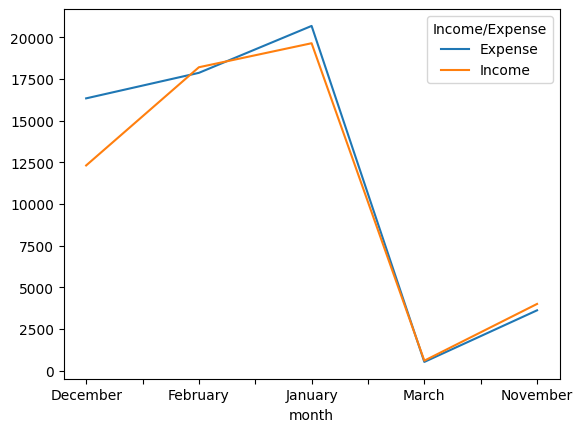

In [ ]:
expense.pivot_table(index='month', columns='Income/Expense', values='INR', aggfunc='sum', fill_value=0).plot()

<Axes: xlabel='month'>

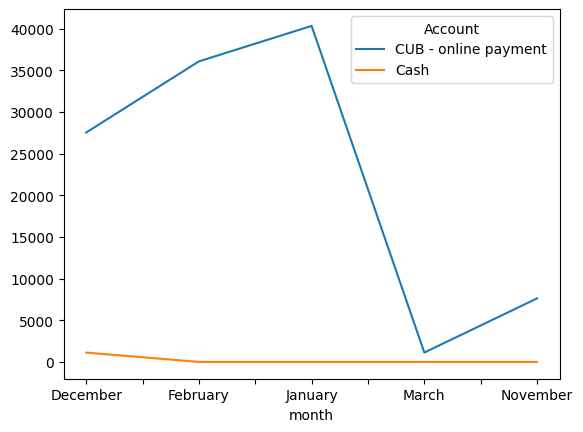

In [ ]:
expense.pivot_table(index='month', columns='Account', values='INR', aggfunc='sum', fill_value=0).plot()

# **Part 2: Pandas String**

In [ ]:
# what are vectorized operations
a = np.array([1,2,3,4])
a*4

array([ 4,  8, 12, 16])

In [ ]:
# problem in vectorized operations in vanilla python
s = ['cat', 'mat', None, 'rat']

[i.startswith('c') for i in s]

AttributeError: 'NoneType' object has no attribute 'startswith'

In [ ]:
# how pandas solve this issue?
s = pd.Series(['cat', 'mat', None, 'rat'])

# string accessor
s.str.startswith('c')

# fast and optimized

,0
0,True
1,False
2,None
3,False


In [ ]:
# import titanic
titanic = pd.read_csv('/content/titanic.csv')
titanic['Name']

,Name
0,"Braund, Mr. Owen Harris"
1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,"Heikkinen, Miss. Laina"
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,"Allen, Mr. William Henry"
...,...
886,"Montvila, Rev. Juozas"
887,"Graham, Miss. Margaret Edith"
888,"Johnston, Miss. Catherine Helen ""Carrie"""
889,"Behr, Mr. Karl Howell"


In [ ]:
# common functions
# lower/upper/capitalize/title
titanic['Name'].str.lower()
titanic['Name'].str.upper()
titanic['Name'].str.capitalize()
titanic['Name'].str.title()

,Name
0,"Braund, Mr. Owen Harris"
1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,"Heikkinen, Miss. Laina"
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,"Allen, Mr. William Henry"
...,...
886,"Montvila, Rev. Juozas"
887,"Graham, Miss. Margaret Edith"
888,"Johnston, Miss. Catherine Helen ""Carrie"""
889,"Behr, Mr. Karl Howell"


In [ ]:
# len
titanic[titanic['Name'].str.len() == 82]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
307,308,1,1,"Penasco y Castellana, Mrs. Victor de Satode (M...",female,17.0,1,0,PC 17758,108.9,C65,C


In [ ]:
# strip
titanic['Name'].str.strip()

,Name
0,"Braund, Mr. Owen Harris"
1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,"Heikkinen, Miss. Laina"
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,"Allen, Mr. William Henry"
...,...
886,"Montvila, Rev. Juozas"
887,"Graham, Miss. Margaret Edith"
888,"Johnston, Miss. Catherine Helen ""Carrie"""
889,"Behr, Mr. Karl Howell"


In [ ]:
# split --> get
titanic['Last_Name'] = titanic['Name'].str.split(',').str.get(0)

titanic['Title'] = titanic['Name'].str.split(',').str.get(1).str.strip().str.split(' ', n=1, expand=True)[0]
titanic['First_Name'] = titanic['Name'].str.split(',').str.get(1).str.strip().str.split(' ', n=1, expand=True)[1]
titanic['Title'].value_counts()

,count
Title,
Mr.,517
Miss.,182
Mrs.,125
Master.,40
Dr.,7
Rev.,6
Mlle.,2
Major.,2
Col.,2


In [ ]:
# replace
titanic['Title'] = titanic['Title'].str.replace('Ms.', 'Miss.')
titanic['Title'] = titanic['Title'].str.replace('Mlle.', 'Miss.')

In [ ]:
titanic['Title'].value_counts()

,count
Title,
Mr.,517
Miss.,185
Mrs.,125
Master.,40
Dr.,7
Rev.,6
Major.,2
Col.,2
Don.,1


In [ ]:
# filtering
# startswith/endswith
titanic[titanic['First_Name'].str.startswith('A')]
titanic[titanic['First_Name'].str.endswith('A')]

# isdigit/isalpha
titanic[titanic['First_Name'].str.isdigit()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Last_Name,Title,First_Name


In [ ]:
# applying regex
# contains
# search john --> both case
titanic[titanic['First_Name'].str.contains('john', case=False)]

# find lastnames start or end with vowel char
titanic[titanic['Last_Name'].str.contains('^[^aeiouAEIOU].+[^aeiouAEIOU]$')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Last_Name,Title,First_Name
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr.,Owen Harris
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs.,John Bradley (Florence Briggs Thayer)
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss.,Laina
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Moran,Mr.,James
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,McCarthy,Mr.,Timothy J
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S,Sutehall,Mr.,Henry Jr
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Graham,Miss.,Margaret Edith
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Johnston,Miss.,"Catherine Helen ""Carrie"""
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Behr,Mr.,Karl Howell


In [ ]:
# slicing
titanic['Name'].str[:5:2]

,Name
0,Ban
1,Cmn
2,Hik
3,Fte
4,Aln
...,...
886,Mnv
887,Gaa
888,Jhs
889,"Bh,"


# **Part 2: Pandas DateTime**

## Timestamp Object
Time stamps reference particular moments in time (e.g., Oct 24th, 2022 at 7:00pm)

In [ ]:
# creating a timestamp
type(pd.Timestamp('2025/03/05'))

pandas._libs.tslibs.timestamps.Timestamp

In [29]:
# variations
pd.Timestamp('2025, 3, 5')
pd.Timestamp('2025-3-5 19:45')

Timestamp('2025-03-05 19:45:00')

In [ ]:
# only year
pd.Timestamp('2025')

Timestamp('2025-01-01 00:00:00')

In [ ]:
# using text
pd.Timestamp('3rd March 2025')

Timestamp('2025-03-03 00:00:00')

In [ ]:
# providing time also
pd.Timestamp(2025, 3, 5, 19, 32)

Timestamp('2025-03-05 19:32:00')

In [ ]:
pd.Timestamp('5th March 2025 09:45AM')

Timestamp('2025-03-05 09:45:00')

In [22]:
# using datetime.datetime object
import datetime as dt

x = pd.Timestamp(dt.datetime(2025, 5, 3, 8, 32,55))
x

Timestamp('2025-05-03 08:32:55')

In [ ]:
x.year
x.month
x.day
x.hour
x.minute
x.second

55

In [ ]:
# why separate objects to handle data and time when python already has datetime functionality?

- syntax wise datetime is very convenient
- But the performance takes a hit while working with huge data. List vs Numpy Array
- The weaknesses of Python's datetime format inspired the NumPy team to add a set of native time series data type to NumPy.
- The datetime64 dtype encodes dates as 64-bit integers, and thus allows arrays of dates to be represented very compactly.

In [ ]:
date = np.array('2025-05-04', dtype=np.datetime64)
date

array('2025-05-04', dtype='datetime64[D]')

In [ ]:
date + np.arange(12)

array(['2025-05-04', '2025-05-05', '2025-05-06', '2025-05-07',
       '2025-05-08', '2025-05-09', '2025-05-10', '2025-05-11',
       '2025-05-12', '2025-05-13', '2025-05-14', '2025-05-15'],
      dtype='datetime64[D]')

- Because of the uniform type in NumPy datetime64 arrays, this type of operation can be accomplished much more quickly than if we were working directly with Python's datetime objects, especially as arrays get large

- Pandas Timestamp object combines the ease-of-use of python datetime with the efficient storage and vectorized interface of numpy.datetime64

- From a group of these Timestamp objects, Pandas can construct a DatetimeIndex that can be used to index data in a Series or DataFrame

## DatetimeIndex Object
A collection of pandas timestamp

In [20]:
# from strings
pd.DatetimeIndex(['2025/1/1', '2025/2/2', '2025/3/3'])

DatetimeIndex(['2025-01-01', '2025-02-02', '2025-03-03'], dtype='datetime64[ns]', freq=None)

In [ ]:
# using python datetime object
pd.DatetimeIndex([dt.datetime(2025,1,1), dt.datetime(2025,2,2), dt.datetime(2025,3,3)])

DatetimeIndex(['2025-01-01', '2025-02-02', '2025-03-03'], dtype='datetime64[ns]', freq=None)

In [ ]:
# using pd.timestamps
dt_index = pd.DatetimeIndex([pd.Timestamp(2025,1,1), pd.Timestamp(2025,2,2), pd.Timestamp(2025,3,3)])
dt_index

DatetimeIndex(['2025-01-01', '2025-02-02', '2025-03-03'], dtype='datetime64[ns]', freq=None)

In [ ]:
# using datetimeindex as series index
pd.Series([1,2,3], index=dt_index)

,0
2025-01-01,1
2025-02-02,2
2025-03-03,3


In [ ]:
# generate daily dates in a given range
pd.date_range(start='2025/02/05', end='2025/02/25', freq='D')

DatetimeIndex(['2025-02-05', '2025-02-08', '2025-02-11', '2025-02-14',
               '2025-02-17', '2025-02-20', '2025-02-23'],
              dtype='datetime64[ns]', freq='3D')

In [ ]:
# alternative days in a given range
pd.date_range(start='2025/02/05', end='2025/02/25', freq='2D')
pd.date_range(start='2025/02/05', end='2025/02/25', freq='3D')

DatetimeIndex(['2025-02-05', '2025-02-08', '2025-02-11', '2025-02-14',
               '2025-02-17', '2025-02-20', '2025-02-23'],
              dtype='datetime64[ns]', freq='3D')

In [ ]:
# B --> Business days
pd.date_range(start='2025/02/05', end='2025/02/25', freq='B')

DatetimeIndex(['2025-02-05', '2025-02-06', '2025-02-07', '2025-02-10',
               '2025-02-11', '2025-02-12', '2025-02-13', '2025-02-14',
               '2025-02-17', '2025-02-18', '2025-02-19', '2025-02-20',
               '2025-02-21', '2025-02-24', '2025-02-25'],
              dtype='datetime64[ns]', freq='B')

In [ ]:
# W --> one week per day
pd.date_range(start='2025/02/05', end='2025/02/25', freq='W-FRI')

DatetimeIndex(['2025-02-07', '2025-02-14', '2025-02-21'], dtype='datetime64[ns]', freq='W-FRI')

In [ ]:
# H --> Hourly data (factor)
pd.date_range(start='2025/02/05', end='2025/02/25', freq='6H')

<ipython-input-55-7283240d0c37>:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  pd.date_range(start='2025/02/05', end='2025/02/25', freq='6H')


DatetimeIndex(['2025-02-05 00:00:00', '2025-02-05 06:00:00',
               '2025-02-05 12:00:00', '2025-02-05 18:00:00',
               '2025-02-06 00:00:00', '2025-02-06 06:00:00',
               '2025-02-06 12:00:00', '2025-02-06 18:00:00',
               '2025-02-07 00:00:00', '2025-02-07 06:00:00',
               '2025-02-07 12:00:00', '2025-02-07 18:00:00',
               '2025-02-08 00:00:00', '2025-02-08 06:00:00',
               '2025-02-08 12:00:00', '2025-02-08 18:00:00',
               '2025-02-09 00:00:00', '2025-02-09 06:00:00',
               '2025-02-09 12:00:00', '2025-02-09 18:00:00',
               '2025-02-10 00:00:00', '2025-02-10 06:00:00',
               '2025-02-10 12:00:00', '2025-02-10 18:00:00',
               '2025-02-11 00:00:00', '2025-02-11 06:00:00',
               '2025-02-11 12:00:00', '2025-02-11 18:00:00',
               '2025-02-12 00:00:00', '2025-02-12 06:00:00',
               '2025-02-12 12:00:00', '2025-02-12 18:00:00',
               '2025-02-

In [ ]:
# M --> Month end
pd.date_range(start='2025/02/05', end='2025/05/25', freq='M')


<ipython-input-57-6c309ad4cf8d>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  pd.date_range(start='2025/02/05', end='2025/05/25', freq='M')


DatetimeIndex(['2025-02-28', '2025-03-31', '2025-04-30'], dtype='datetime64[ns]', freq='ME')

In [ ]:
# MS --> Month Start
pd.date_range(start='2025/02/05', end='2025/05/25', freq='MS')

DatetimeIndex(['2025-03-01', '2025-04-01', '2025-05-01'], dtype='datetime64[ns]', freq='MS')

In [ ]:
# A --> Year end
pd.date_range(start='2025/02/05', end='2035/02/25', freq='A')

<ipython-input-61-079982dccf1d>:2: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  pd.date_range(start='2025/02/05', end='2035/02/25', freq='A')


DatetimeIndex(['2025-12-31', '2026-12-31', '2027-12-31', '2028-12-31',
               '2029-12-31', '2030-12-31', '2031-12-31', '2032-12-31',
               '2033-12-31', '2034-12-31'],
              dtype='datetime64[ns]', freq='YE-DEC')

In [ ]:
# using periods (number of results)
pd.date_range(start='2032/05/03', periods=25, freq='D')
pd.date_range(start='2032/05/03', periods=25, freq='2D')

DatetimeIndex(['2032-05-03', '2032-05-05', '2032-05-07', '2032-05-09',
               '2032-05-11', '2032-05-13', '2032-05-15', '2032-05-17',
               '2032-05-19', '2032-05-21', '2032-05-23', '2032-05-25',
               '2032-05-27', '2032-05-29', '2032-05-31', '2032-06-02',
               '2032-06-04', '2032-06-06', '2032-06-08', '2032-06-10',
               '2032-06-12', '2032-06-14', '2032-06-16', '2032-06-18',
               '2032-06-20'],
              dtype='datetime64[ns]', freq='2D')

## to_datetime function
converts an existing objects to pandas timestamp/datetimeindex object

In [ ]:
# simple series example

s = pd.Series(['2025/1/1', '2025/2/2', '2025/3/3'])
s.str.split('/').str.get(0)

,0
0,2025
1,2025
2,2025


In [46]:
# easy way to access information
pd.to_datetime(s).dt.month_name()

,0
0,January
1,February
2,March


In [41]:
# prompt: pd.to_datetime(s).dt.day_name() give every values like this 'day_name()'

s = pd.Series(['2025/1/1', '2025/2/2', '2025/3/3'])
pd.to_datetime(s).dt.month_name()


,0
0,January
1,February
2,March


In [ ]:
# with errors
e = pd.Series(['2025/1/1', '2025/2/2', '2025/130/3'])
pd.to_datetime(e, errors='coerce').dt.month_name()

,0
0,January
1,February
2,NaN


In [ ]:
df = pd.read_csv('/content/expense_data.csv')

In [ ]:
df.shape

(277, 11)

In [ ]:
df.head()

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1
0,3/2/2022 10:11,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0
1,3/2/2022 10:11,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0
2,3/1/2022 19:50,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0
3,3/1/2022 18:56,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0
4,3/1/2022 18:22,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            277 non-null    object 
 1   Account         277 non-null    object 
 2   Category        277 non-null    object 
 3   Subcategory     0 non-null      float64
 4   Note            273 non-null    object 
 5   INR             277 non-null    float64
 6   Income/Expense  277 non-null    object 
 7   Note.1          0 non-null      float64
 8   Amount          277 non-null    float64
 9   Currency        277 non-null    object 
 10  Account.1       277 non-null    float64
dtypes: float64(5), object(6)
memory usage: 23.9+ KB


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            277 non-null    datetime64[ns]
 1   Account         277 non-null    object        
 2   Category        277 non-null    object        
 3   Subcategory     0 non-null      float64       
 4   Note            273 non-null    object        
 5   INR             277 non-null    float64       
 6   Income/Expense  277 non-null    object        
 7   Note.1          0 non-null      float64       
 8   Amount          277 non-null    float64       
 9   Currency        277 non-null    object        
 10  Account.1       277 non-null    float64       
dtypes: datetime64[ns](1), float64(5), object(5)
memory usage: 23.9+ KB


In [ ]:
# benefits
df['Date'].dt.is_month_end

,Date
0,False
1,False
2,False
3,False
4,False
...,...
272,False
273,False
274,False
275,False


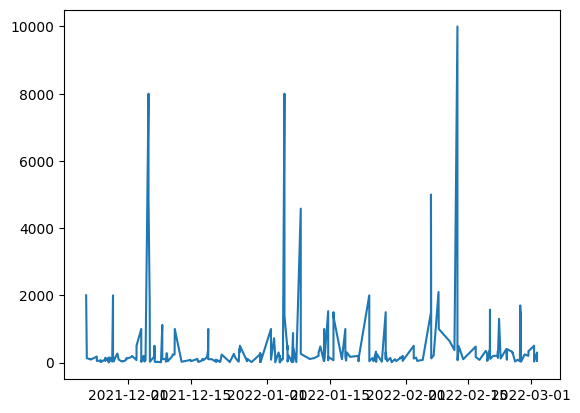

In [ ]:
# plot graphs
import matplotlib.pyplot as plt
plt.plot(df['Date'], df['INR'])

In [ ]:
# day name wise bar chart/month wise bar chart

df['day_name'] = df['Date'].dt.day_name()
df.head()

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1,day_name
0,2022-03-02 10:11:00,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0,Wednesday
1,2022-03-02 10:11:00,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0,Wednesday
2,2022-03-01 19:50:00,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0,Tuesday
3,2022-03-01 18:56:00,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0,Tuesday
4,2022-03-01 18:22:00,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0,Tuesday


<Axes: xlabel='day_name'>

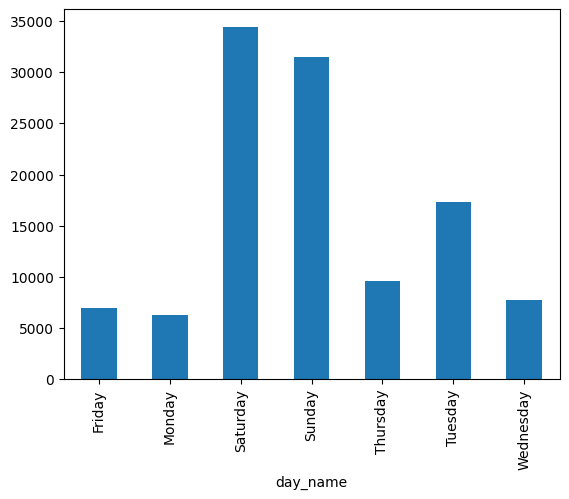

In [ ]:
df.groupby('day_name')['INR'].sum().plot(kind='bar')

In [ ]:
df['month_name'] = df['Date'].dt.month_name()
df.head()

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1,day_name,month_name
0,2022-03-02 10:11:00,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0,Wednesday,March
1,2022-03-02 10:11:00,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0,Wednesday,March
2,2022-03-01 19:50:00,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0,Tuesday,March
3,2022-03-01 18:56:00,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0,Tuesday,March
4,2022-03-01 18:22:00,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0,Tuesday,March


<Axes: xlabel='month_name'>

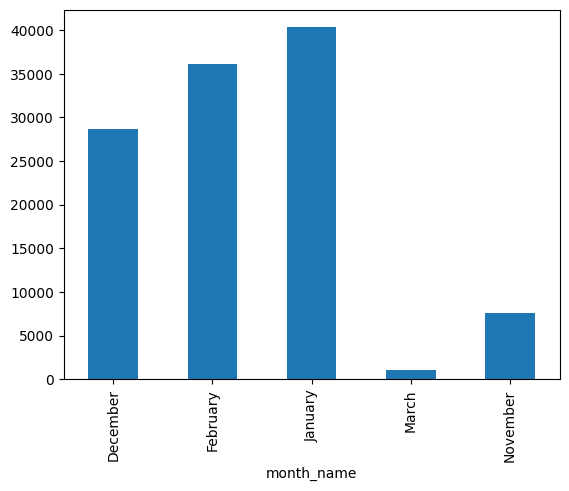

In [ ]:
df.groupby('month_name')['INR'].sum().plot(kind='bar')

In [ ]:
df[df['Date'].dt.is_month_end]

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1,day_name,month_name
7,2022-02-28 11:56:00,CUB - online payment,Food,NaN,Pizza,339.15,Expense,NaN,339.15,INR,339.15,Monday,February
8,2022-02-28 11:45:00,CUB - online payment,Other,NaN,From kumara,200.00,Income,NaN,200.00,INR,200.00,Monday,February
61,2022-01-31 08:44:00,CUB - online payment,Transportation,NaN,Vnr to apk,50.00,Expense,NaN,50.00,INR,50.00,Monday,January
62,2022-01-31 08:27:00,CUB - online payment,Other,NaN,To vicky,200.00,Expense,NaN,200.00,INR,200.00,Monday,January
63,2022-01-31 08:26:00,CUB - online payment,Transportation,NaN,To ksr station,153.00,Expense,NaN,153.00,INR,153.00,Monday,January
242,2021-11-30 14:24:00,CUB - online payment,Gift,NaN,Bharath birthday,115.00,Expense,NaN,115.00,INR,115.00,Tuesday,November
243,2021-11-30 14:17:00,CUB - online payment,Food,NaN,Lunch with company,128.00,Expense,NaN,128.00,INR,128.00,Tuesday,November
244,2021-11-30 10:11:00,CUB - online payment,Food,NaN,Breakfast,70.00,Expense,NaN,70.00,INR,70.00,Tuesday,November
